## <font color = 'green'>0. Importing libraries/dataset</font>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [2]:
# tenure, monthlycharges and totalcharges were already processed for the previous lab and the new dataset was saved as a .csv
churndata = pd.read_csv('churndata.csv', index_col=[0])

In [3]:
churndata

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,-1.277445,No,No,Yes,No,No,No,No,Month-to-month,-1.160323,-0.992611,No
1,Male,0,No,No,0.066327,Yes,Yes,No,Yes,No,No,No,One year,-0.259629,-0.172165,No
2,Male,0,No,No,-1.236724,Yes,Yes,Yes,No,No,No,No,Month-to-month,-0.362660,-0.958066,Yes
3,Male,0,No,No,0.514251,No,Yes,No,Yes,Yes,No,No,One year,-0.746535,-0.193672,No
4,Female,0,No,No,-1.236724,Yes,No,No,No,No,No,No,Month-to-month,0.197365,-0.938874,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,-0.340876,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,0.665992,-0.127605,No
7039,Female,0,Yes,Yes,1.613701,Yes,No,Yes,Yes,No,Yes,Yes,One year,1.277533,2.242606,No
7040,Female,0,Yes,Yes,-0.870241,No,Yes,No,No,No,No,No,Month-to-month,-1.168632,-0.852932,No
7041,Male,1,Yes,No,-1.155283,Yes,No,No,No,No,No,No,Month-to-month,0.320338,-0.870513,Yes


In [4]:
# a general look at the features characteristics
churndata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   float64
 5   phoneservice      7043 non-null   object 
 6   onlinesecurity    7043 non-null   object 
 7   onlinebackup      7043 non-null   object 
 8   deviceprotection  7043 non-null   object 
 9   techsupport       7043 non-null   object 
 10  streamingtv       7043 non-null   object 
 11  streamingmovies   7043 non-null   object 
 12  contract          7043 non-null   object 
 13  monthlycharges    7043 non-null   float64
 14  totalcharges      7043 non-null   float64
 15  churn             7043 non-null   object 
dtypes: float64(3), int64(1), object(12)
memory usag

In [5]:
# checking for white spaces in the dataset
for col_name in churndata.columns:
    print(col_name, len(churndata[churndata[col_name] == ' ']))

gender 0
seniorcitizen 0
partner 0
dependents 0
tenure 0
phoneservice 0
onlinesecurity 0
onlinebackup 0
deviceprotection 0
techsupport 0
streamingtv 0
streamingmovies 0
contract 0
monthlycharges 0
totalcharges 0
churn 0


*Before using any form of prediction model, the categorical features with the exception of the target (churn) will be encoded.*

In [6]:
# X/y split
X = churndata.drop('churn', axis = 1)
y = churndata['churn']

In [7]:
# checking values for said features
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        print(col_name, '\n', X[col_name].unique())

gender 
 ['Female' 'Male']
partner 
 ['Yes' 'No']
dependents 
 ['No' 'Yes']
phoneservice 
 ['No' 'Yes']
onlinesecurity 
 ['No' 'Yes' 'No internet service']
onlinebackup 
 ['Yes' 'No' 'No internet service']
deviceprotection 
 ['No' 'Yes' 'No internet service']
techsupport 
 ['No' 'Yes' 'No internet service']
streamingtv 
 ['No' 'Yes' 'No internet service']
streamingmovies 
 ['No' 'Yes' 'No internet service']
contract 
 ['Month-to-month' 'One year' 'Two year']


In [8]:
cats = X.select_dtypes(include = 'object')
cats_list = cats.columns

In [9]:
# one-hot encoding of X using pd.get_dummies
X = pd.get_dummies(X, columns = cats_list, dtype = float, drop_first= True)
X

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,onlinesecurity_No internet service,onlinesecurity_Yes,...,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No internet service,techsupport_Yes,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No internet service,streamingmovies_Yes,contract_One year,contract_Two year
0,0,-1.277445,-1.160323,-0.992611,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.066327,-0.259629,-0.172165,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,-1.236724,-0.362660,-0.958066,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.514251,-0.746535,-0.193672,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,-1.236724,0.197365,-0.938874,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.340876,0.665992,-0.127605,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
7039,0,1.613701,1.277533,2.242606,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
7040,0,-0.870241,-1.168632,-0.852932,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7041,1,-1.155283,0.320338,-0.870513,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# function to run model of choice and generate classification report and confusion matrix visualisation
def run_model(X, y, model):
    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
    # fitting model
    which_model = model
    which_model.fit(X_train, y_train)
    # generating classification report
    predictions = which_model.predict(X_test)
    eval_metrics = classification_report(y_test, predictions)
    # creating confusion matrix
    cm = metrics.confusion_matrix(y_test, predictions)
    cm_viz = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
    cm_viz.plot()
    # defining output
    print(model.__class__.__name__) # .__class__.__name__ to extract only the name of the model for the sake of readability
    print(eval_metrics)
    plt.title(model.__class__.__name__, fontsize = 17)
    plt.show()

*And before any up-/downsampling methods are applied both models will be benchmarked*

LogisticRegression
              precision    recall  f1-score   support

          No       0.85      0.90      0.87      1282
         Yes       0.68      0.57      0.62       479

    accuracy                           0.81      1761
   macro avg       0.76      0.73      0.75      1761
weighted avg       0.80      0.81      0.80      1761



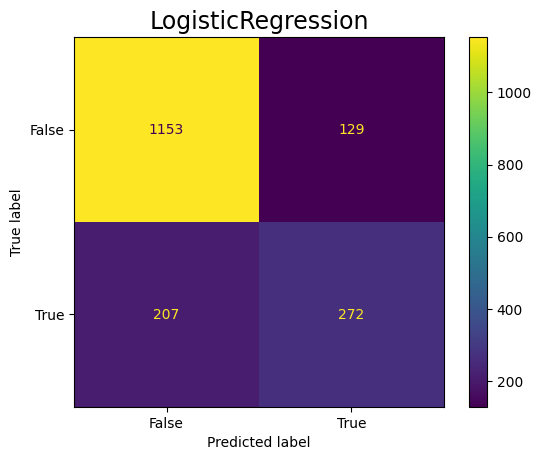

In [11]:
run_model(X, y, LogisticRegression())

DecisionTreeClassifier
              precision    recall  f1-score   support

          No       0.81      0.82      0.81      1282
         Yes       0.50      0.48      0.49       479

    accuracy                           0.73      1761
   macro avg       0.65      0.65      0.65      1761
weighted avg       0.72      0.73      0.72      1761



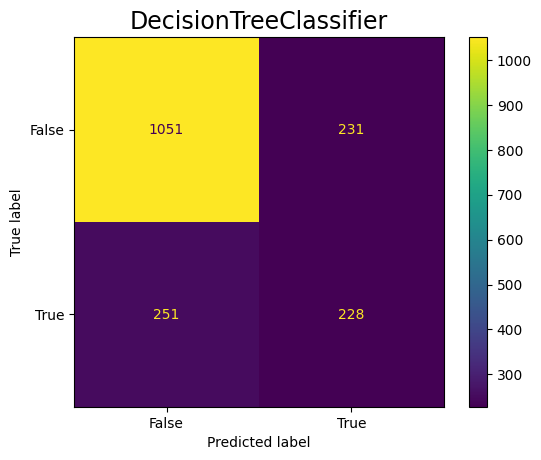

In [12]:
run_model(X, y, DecisionTreeClassifier())

In the benchmarks, logistic regression performs better as it has a greater accuracy and less biased predictions as indicated from its scores for precision, recall and f1-score.

In [13]:
# function for cross-validation of models and comparison of results
def compare_cross_val(X, y):
    log_reg = LogisticRegression()
    dec_tree = DecisionTreeClassifier()
    scores_log = cross_val_score(log_reg, X, y, cv=4)
    scores_tree = cross_val_score(dec_tree, X, y, cv=4)
    print('Logistic Regression Cross-Validation Scores:', '\n', scores_log, '\n')
    print('Decision Tree Cross-Validation Scores:', '\n', scores_tree)

In [14]:
compare_cross_val(X, y)

Logistic Regression Cross-Validation Scores: 
 [0.80579216 0.79670642 0.78932425 0.80511364] 

Decision Tree Cross-Validation Scores: 
 [0.73651334 0.73253833 0.7092561  0.73977273]


Cross-validating the accuracy scores, the logistic regression continues to perform better.

## <font color = 'green'>1. Upsampling data using SMOTE</font>

In [15]:
# applying smote
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

churn
No     5174
Yes    5174
Name: count, dtype: int64

LogisticRegression
              precision    recall  f1-score   support

          No       0.81      0.73      0.77      1298
         Yes       0.75      0.83      0.79      1289

    accuracy                           0.78      2587
   macro avg       0.78      0.78      0.78      2587
weighted avg       0.78      0.78      0.78      2587



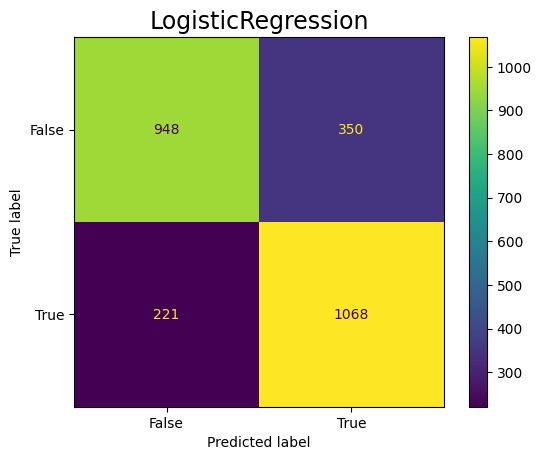

In [16]:
run_model(X_sm, y_sm, LogisticRegression())

DecisionTreeClassifier
              precision    recall  f1-score   support

          No       0.78      0.78      0.78      1298
         Yes       0.78      0.78      0.78      1289

    accuracy                           0.78      2587
   macro avg       0.78      0.78      0.78      2587
weighted avg       0.78      0.78      0.78      2587



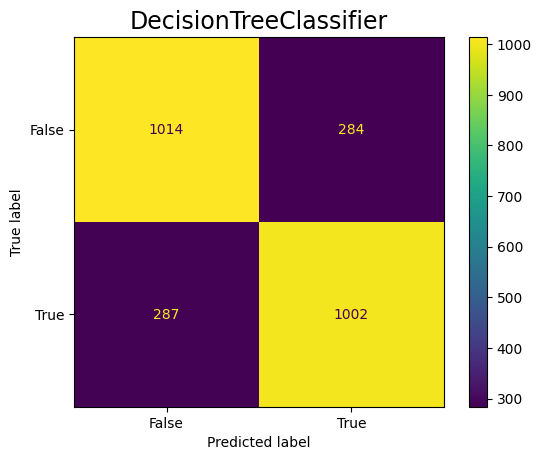

In [17]:
run_model(X_sm, y_sm, DecisionTreeClassifier())

There is no difference between the accuracy scores. However, the decision tree model's other precision and recall differentiate less between the 2 classes, which is not only worth mentioning, but shows that the model's capability for prediction is more reliable (at least with the given data).

In [18]:
compare_cross_val(X_sm, y_sm)

Logistic Regression Cross-Validation Scores: 
 [0.76652493 0.76923077 0.76613838 0.76807112] 

Decision Tree Cross-Validation Scores: 
 [0.72748357 0.78160031 0.79165056 0.803247  ]


In addition to the above, by cross-validating the accuracy score for the 2 models, it seems that depending on the random test sample it could be that the decision tree's score is better even than that of the logistic regression.

## <font color = 'green'>2. Downsampling data using TomekLinks</font>

In [19]:
tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X, y)
y_tl.value_counts()

churn
No     4639
Yes    1869
Name: count, dtype: int64

LogisticRegression
              precision    recall  f1-score   support

          No       0.87      0.88      0.88      1171
         Yes       0.69      0.66      0.68       456

    accuracy                           0.82      1627
   macro avg       0.78      0.77      0.78      1627
weighted avg       0.82      0.82      0.82      1627



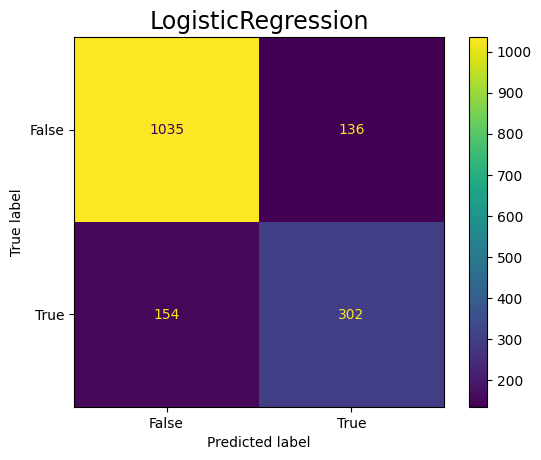

In [20]:
run_model(X_tl, y_tl, LogisticRegression())

DecisionTreeClassifier
              precision    recall  f1-score   support

          No       0.84      0.81      0.83      1171
         Yes       0.56      0.62      0.59       456

    accuracy                           0.76      1627
   macro avg       0.70      0.71      0.71      1627
weighted avg       0.76      0.76      0.76      1627



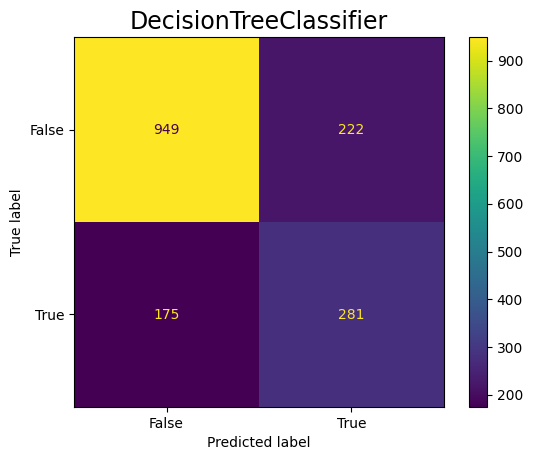

In [21]:
run_model(X_tl, y_tl, DecisionTreeClassifier())

Here the logistic regression model performs clearly much better with an acurracy of 82%, as well as considering all of the evaluation metrics above, but both models are biased towards the class "No" and this has to do with the way in which TomekLinks functions, which is that it only removes data points of the majority class, when they are in the immediate vicinity of the minority class's data points.

In [22]:
compare_cross_val(X_tl, y_tl)

Logistic Regression Cross-Validation Scores: 
 [0.81253841 0.81253841 0.80208974 0.82544561] 

Decision Tree Cross-Validation Scores: 
 [0.73755378 0.76398279 0.74062692 0.76275353]


Cross-validating the accuracy scores further suppports the statement above.

<font color = 'red'>**- Reapplying TomekLinks algorithm and running models again**<font>

In [23]:
tl2 = TomekLinks(sampling_strategy='majority')
X_tl2, y_tl2 = tl.fit_resample(X, y)
y_tl2.value_counts()

churn
No     4639
Yes    1869
Name: count, dtype: int64

LogisticRegression
              precision    recall  f1-score   support

          No       0.87      0.88      0.88      1171
         Yes       0.69      0.66      0.68       456

    accuracy                           0.82      1627
   macro avg       0.78      0.77      0.78      1627
weighted avg       0.82      0.82      0.82      1627



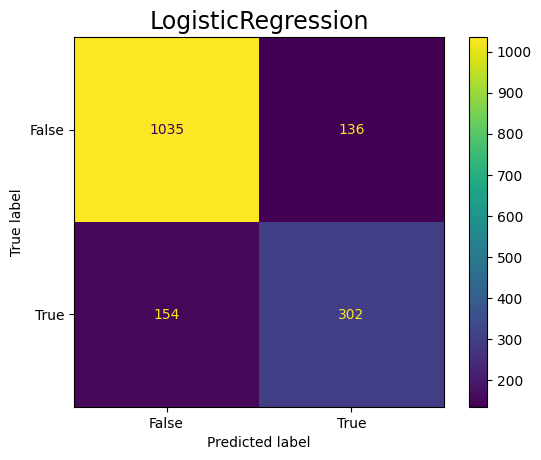

In [24]:
run_model(X_tl2, y_tl2, LogisticRegression())

DecisionTreeClassifier
              precision    recall  f1-score   support

          No       0.85      0.80      0.83      1171
         Yes       0.56      0.64      0.60       456

    accuracy                           0.76      1627
   macro avg       0.71      0.72      0.71      1627
weighted avg       0.77      0.76      0.76      1627



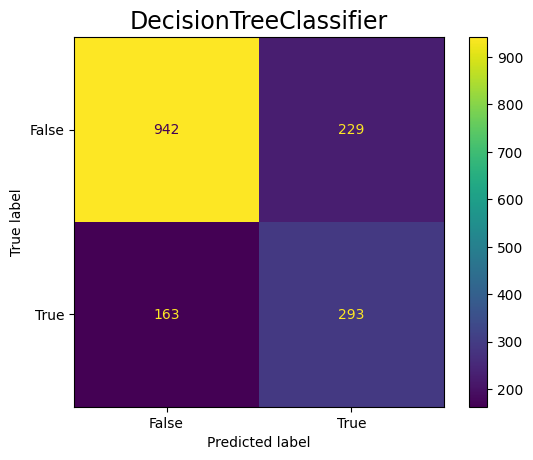

In [25]:
run_model(X_tl2, y_tl2, DecisionTreeClassifier())

Running the models again did not have an effect on any of the evaluation metrics of the logistic regression model. Indeed even the confusion matrix came out exactly the same.

<br>For the decision tree minor differences are observed in the precision, recall and f1-scores, but the accuracy remains the same.
